In [67]:
import numpy as np
import pandas as pd



In [68]:
df= pd.read_csv("disease_data.csv")

In [69]:
df.head()

,Unnamed: 0,Disease,Symptom
0,0,Alzheimer's disease,"['drool', 'agitation', 'nightmare', 'rhonchus'..."
1,1,Pneumocystis carinii pneumonia,"['yellow sputum', 'cachexia', 'chill', 'decrea..."
2,2,accident cerebrovascular,"['dysarthria', 'asthenia', 'speech slurred', '..."
3,3,adenocarcinoma,"['mass of body structure', 'lesion', 'decrease..."
4,4,adhesion,"['flatulence', 'pain', 'large-for-dates fetus'..."


In [70]:
df = df.drop(columns=["Unnamed: 0"])


In [71]:
df.head(10)

,Disease,Symptom
0,Alzheimer's disease,"['drool', 'agitation', 'nightmare', 'rhonchus'..."
1,Pneumocystis carinii pneumonia,"['yellow sputum', 'cachexia', 'chill', 'decrea..."
2,accident cerebrovascular,"['dysarthria', 'asthenia', 'speech slurred', '..."
3,adenocarcinoma,"['mass of body structure', 'lesion', 'decrease..."
4,adhesion,"['flatulence', 'pain', 'large-for-dates fetus'..."
5,affect labile,"['extreme exhaustion', 'sleeplessness', 'enure..."
6,anemia,"['chill', 'guaiac positive', 'monoclonal', 'ec..."
7,anxiety state,"['worry', 'feeling suicidal', 'suicidal', 'sle..."
8,aphasia,"['clonus', 'egophony', 'facial paresis', 'apha..."
9,arthritis,"['pain', 'hemodynamically stable', 'sleeplessn..."


In [72]:
df.shape

(134, 2)

In [73]:
import ast

df["Symptom"] = df["Symptom"].apply(ast.literal_eval)


In [74]:
df.head()

,Disease,Symptom
0,Alzheimer's disease,"[drool, agitation, nightmare, rhonchus, consci..."
1,Pneumocystis carinii pneumonia,"[yellow sputum, cachexia, chill, decreased bod..."
2,accident cerebrovascular,"[dysarthria, asthenia, speech slurred, facial ..."
3,adenocarcinoma,"[mass of body structure, lesion, decreased bod..."
4,adhesion,"[flatulence, pain, large-for-dates fetus, para..."


In [75]:
all_symptoms = set()

for symptoms in df["Symptom"]:
    for s in symptoms:
        all_symptoms.add(s)

all_symptoms = sorted(list(all_symptoms))


In [76]:
all_symptoms

['',
 "Heberden's node",
 "Murphy's sign",
 "Stahli's line",
 'abdomen acute',
 'abdominal bloating',
 'abdominal tenderness',
 'abnormal sensation',
 'abnormally hard consistency',
 'abortion',
 'abscess bacterial',
 'absences finding',
 'achalasia',
 'ache',
 'adverse effect',
 'agitation',
 'air fluid level',
 'alcohol binge episode',
 'alcoholic withdrawal symptoms',
 'ambidexterity',
 'angina pectoris',
 'anorexia',
 'anosmia',
 'aphagia',
 'apyrexial',
 'arthralgia',
 'ascites',
 'asterixis',
 'asthenia',
 'asymptomatic',
 'ataxia',
 'atypia',
 'aura',
 'awakening early',
 'barking cough',
 'bedridden',
 'behavior hyperactive',
 'behavior showing increased motor activity',
 'blackout',
 'blanch',
 'bleeding of vagina',
 'bowel sounds decreased',
 'bradycardia',
 'bradykinesia',
 'breakthrough pain',
 'breath sounds decreased',
 'breath-holding spell',
 'breech presentation',
 'bruit',
 'burning sensation',
 'cachexia',
 'cardiomegaly',
 'cardiovascular event',
 'catatonia',
 'cat

In [77]:


X = []
y = df["Disease"]

for symptoms in df["Symptom"]:
    row = [1 if s in symptoms else 0 for s in all_symptoms]
    X.append(row)

X = np.array(X)


In [78]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [79]:
y

0                 Alzheimer's disease
1      Pneumocystis carinii pneumonia
2            accident cerebrovascular
3                      adenocarcinoma
4                            adhesion
                    ...              
129             tonic-clonic seizures
130         transient ischemic attack
131     tricuspid valve insufficiency
132                      ulcer peptic
133       upper respiratory infection
Name: Disease, Length: 134, dtype: object

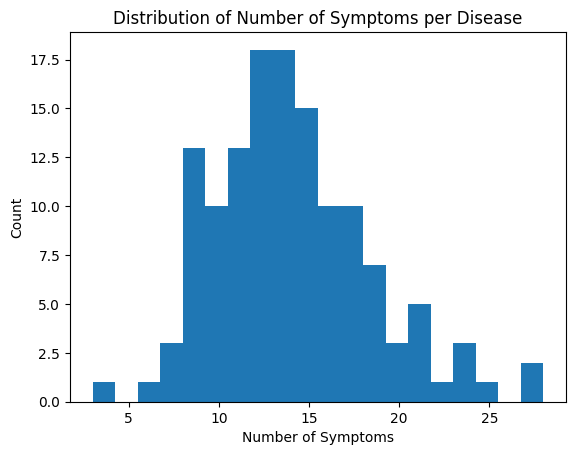

In [80]:
import matplotlib.pyplot as plt

df["num_symptoms"] = df["Symptom"].apply(len)

plt.figure()
plt.hist(df["num_symptoms"], bins=20)
plt.title("Distribution of Number of Symptoms per Disease")
plt.xlabel("Number of Symptoms")
plt.ylabel("Count")
plt.show()



In [81]:
print(type(df["Symptom"][0]))


<class 'list'>


In [82]:
len(all_symptoms)


399

In [83]:

from sklearn.naive_bayes import MultinomialNB



In [84]:
model = MultinomialNB()
model.fit(X, y)

MultinomialNB()

In [85]:
print("Accuracy:", model.score(X, y))

Accuracy: 1.0


In [90]:
def predict_disease(user_symptoms):
    vector = np.array([
        1 if s in user_symptoms else 0
        for s in all_symptoms
    ]).reshape(1, -1)

    probs = model.predict_proba(vector)[0]
    top_indices = probs.argsort()[-3:][::-1]

    for idx in top_indices:
        print(model.classes_[idx], probs[idx])



In [91]:
predict_disease(["fever", "headache"])


exanthema 0.022121018316590437
influenza 0.021493503715364706
decubitus ulcer 0.011730693718566162


In [93]:
import joblib

joblib.dump(model, "naive_bayes_model.joblib")
joblib.dump(all_symptoms, "symptom_list.joblib")


['symptom_list.joblib']

In [94]:
predict_disease(["fever", "headache"])

exanthema 0.022121018316590437
influenza 0.021493503715364706
decubitus ulcer 0.011730693718566162
